In [1]:
import os

os.chdir("..")

In [2]:
import torch
from diffusers.pipelines import FluxPipeline
from src.flux.condition import Condition
from PIL import Image

from src.flux.generate import generate, seed_everything
from src.flux.condition import Condition

In [3]:
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
for condition_type in ["canny", "depth", "coloring", "deblurring"]:
    pipe.load_lora_weights(
        "Yuanshi/OminiControl",
        weight_name=f"experimental/{condition_type}.safetensors",
        adapter_name=condition_type,
    )

canny.safetensors:   0%|          | 0.00/29.1M [00:00<?, ?B/s]

depth.safetensors:   0%|          | 0.00/29.1M [00:00<?, ?B/s]

coloring.safetensors:   0%|          | 0.00/29.1M [00:00<?, ?B/s]

deblurring.safetensors:   0%|          | 0.00/29.1M [00:00<?, ?B/s]

In [5]:
image = Image.open("assets/coffee.png").convert("RGB")

w, h, min_dim = image.size + (min(image.size),)
image = image.crop(
    ((w - min_dim) // 2, (h - min_dim) // 2, (w + min_dim) // 2, (h + min_dim) // 2)
).resize((512, 512))

prompt = "In a bright room. A cup of a coffee with some beans on the side. They are placed on a dark wooden table."

  0%|          | 0/28 [00:00<?, ?it/s]

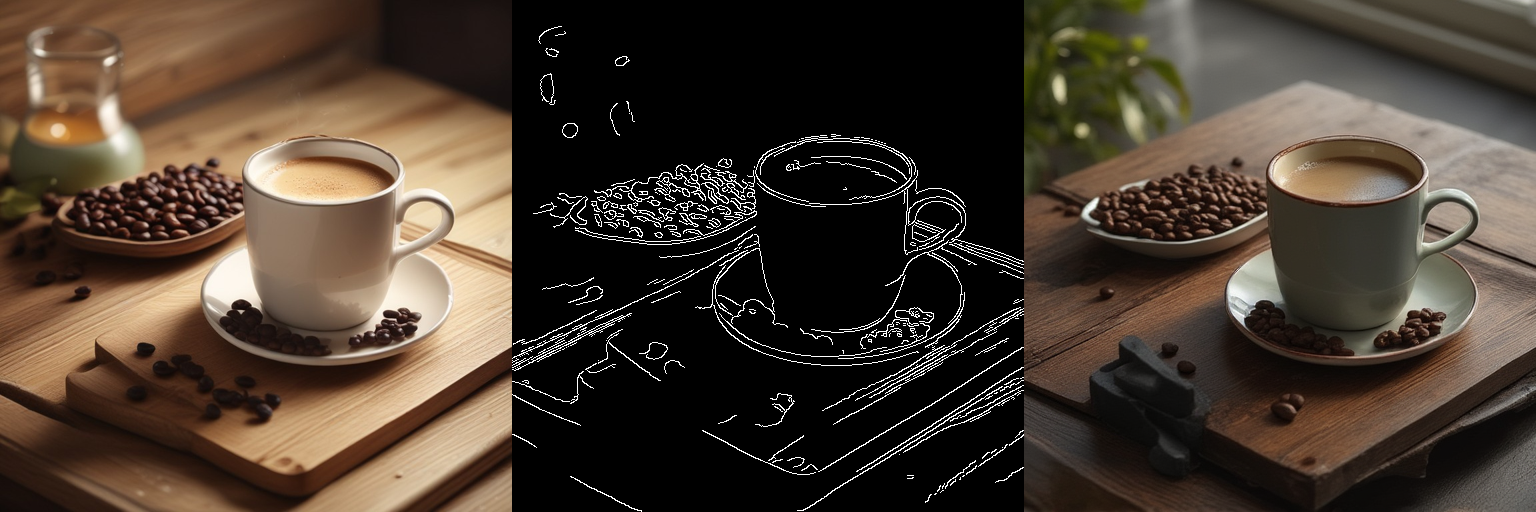

In [6]:
condition = Condition("canny", image)

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda


  0%|          | 0/28 [00:00<?, ?it/s]

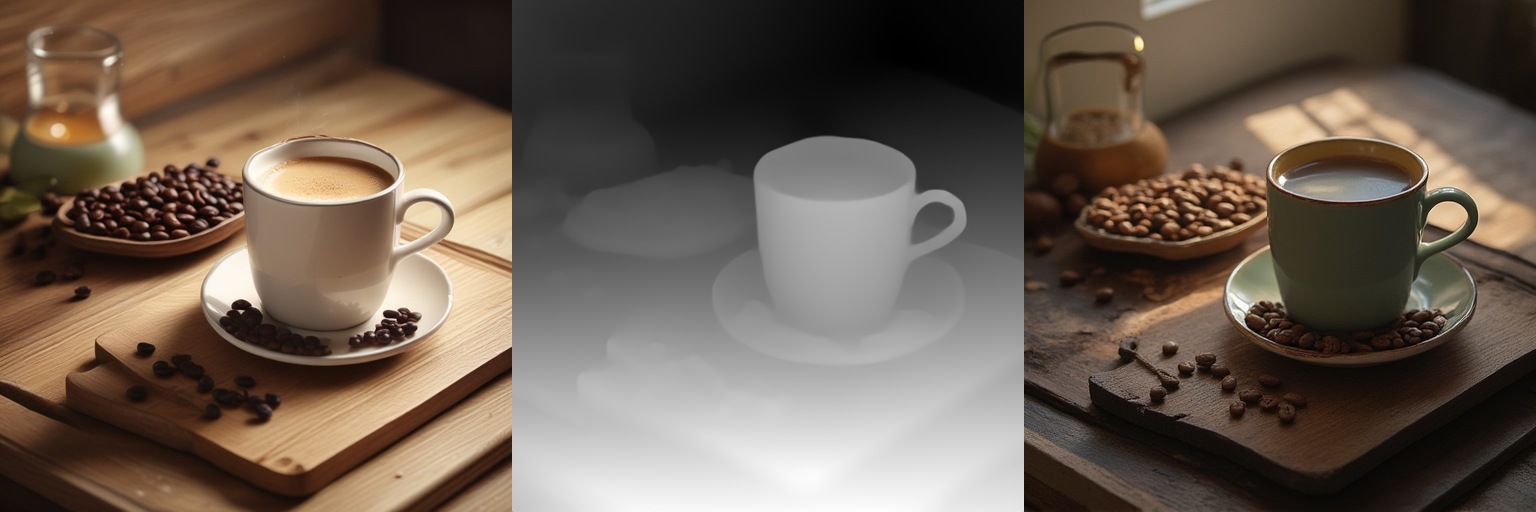

In [7]:
condition = Condition("depth", image)

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

  0%|          | 0/28 [00:00<?, ?it/s]

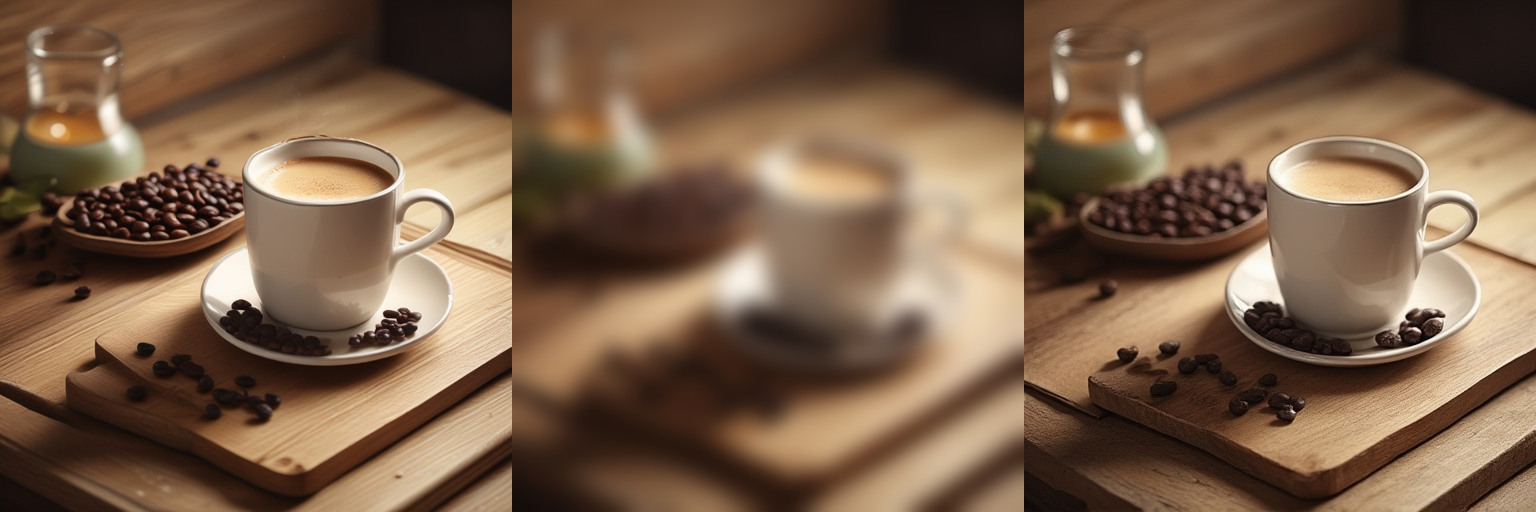

In [8]:
condition = Condition("deblurring", image)

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

  0%|          | 0/28 [00:00<?, ?it/s]

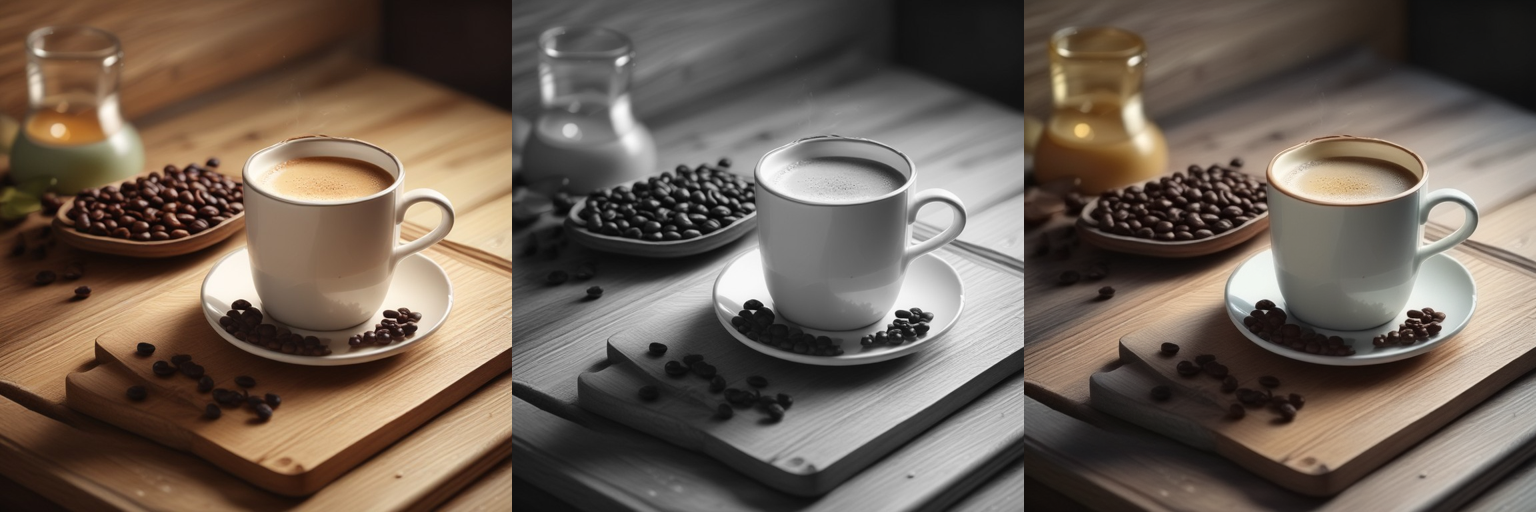

In [9]:
condition = Condition("coloring", image)

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image